#PROBLEM 3A: Social Community Detection
Implement edge-removal community detection algorithm on the Flicker Graph. Use the betweeness idea on edges and the Girvan–Newman Algorithm. The original dataset graph has more than 5M edges; in DM_resources there are 4 different sub-sampled graphs with edge counts from 2K to 600K; you can use these if the original is too big.<br>
You should use a library to support graph operations (edges, vertices, paths, degrees, etc). We used igraph in python which also have builtin community detection algorithms (not allowed); these are useful as a way to evaluate communities you obtain

In [ ]:
!pip install igraph

In [3]:
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd

In [104]:
edges_pd = pd.read_csv('/content/drive/MyDrive/Flickr-dataset/data/Flickr_sampled_edges/edges_sampled_map_2K.csv',header=None)
edges_pd.head()

,0,1
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [105]:
edges_pd.shape

(2098, 2)

In [106]:
edges_pd.nunique()

,0
0,203
1,289


In [107]:
edges = edges_pd.to_numpy()

##Visualizing communities using lib

In [13]:
g = ig.Graph(edges.tolist(), directed=True)

In [14]:
communities = g.community_edge_betweenness()

In [15]:
communities = communities.as_clustering()

In [16]:
num_communities = len(communities)
palette = ig.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    g.vs[community]["color"] = i
    community_edges = g.es.select(_within=community)
    community_edges["color"] = i

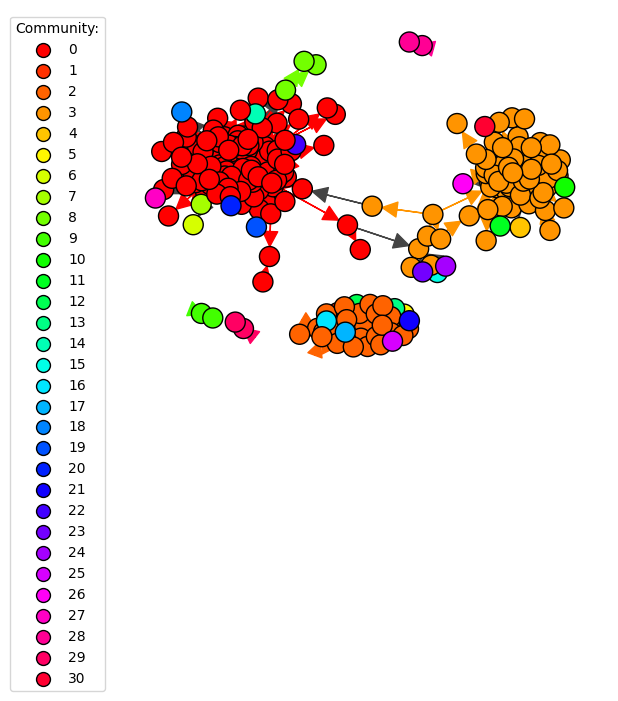

In [17]:
fig, ax = plt.subplots()
ig.plot(
    communities,
    palette=palette,
    edge_width=1,
    target=ax,
    vertex_size=20,
)

# Create a custom color legend
legend_handles = []
for i in range(num_communities):
    handle = ax.scatter(
        [], [],
        s=100,
        facecolor=palette.get(i),
        edgecolor="k",
        label=i,
    )
    legend_handles.append(handle)
ax.legend(
    handles=legend_handles,
    title='Community:',
    bbox_to_anchor=(0, 1.0),
    bbox_transform=ax.transAxes,
)
plt.show()

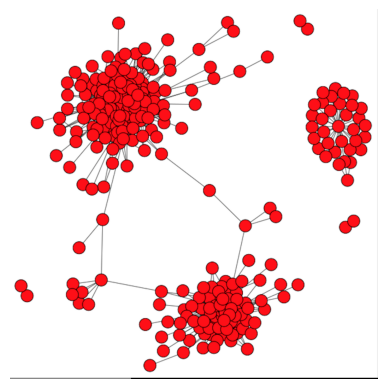

In [21]:
import matplotlib.image as mpimg

# Load and display the image
img = mpimg.imread('/content/drive/MyDrive/Flickr-dataset/data/Flickr_sampled_edges/edges_sampled_2K.png')
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

In [22]:
num_communities

31

##Computing communities

###Sample graph
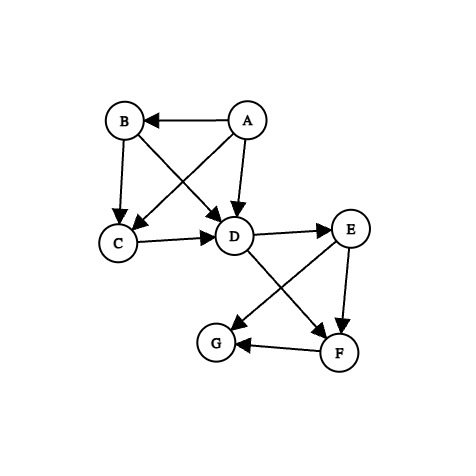

In [138]:
graph = ig.Graph(directed=True)
graph.add_vertices(["A", "B", "C", "D", "E", "F","G"])
graph.add_edges([("A", "B"), ("A", "C"),("A", "D"), ("B", "C"), ("B", "D"), ("C", "D"), ("D", "E"),("D", "F"), ("E", "F"),("E", "G"),("F", "G")])

start_node = "A"
end_node = "G"

shortest_paths = graph.get_all_shortest_paths(start_node, to=end_node)

all_shortest_paths_names = [[graph.vs[vertex]["name"] for vertex in path] for path in shortest_paths]

print("Shortest path:", all_shortest_paths_names)


Shortest path: [['A', 'D', 'F', 'G'], ['A', 'D', 'E', 'G']]


###Betweenness Centrality

In [38]:
edge_betweenness = graph.edge_betweenness()

# Print edge betweenness with the corresponding edges
for edge, betweenness in zip(graph.es, edge_betweenness):
    source = graph.vs[edge.source]["name"]
    target = graph.vs[edge.target]["name"]
    print(f"Edge {source} -> {target}: Betweenness Centrality = {betweenness:.2f}")

Edge A -> B: Betweenness Centrality = 1.00
Edge A -> C: Betweenness Centrality = 1.00
Edge A -> D: Betweenness Centrality = 4.00
Edge B -> C: Betweenness Centrality = 1.00
Edge B -> D: Betweenness Centrality = 4.00
Edge C -> D: Betweenness Centrality = 4.00
Edge D -> E: Betweenness Centrality = 6.00
Edge D -> F: Betweenness Centrality = 6.00
Edge E -> F: Betweenness Centrality = 1.00
Edge E -> G: Betweenness Centrality = 3.00
Edge F -> G: Betweenness Centrality = 3.00


In [137]:
# betweenness
# edge
# for all possible combinations of vertices n(n-1)/2
# get shortest paths b/w strt and end -> get its length -> total_sp_strt_end
# in each shortest path see if edge (i,j) exist and update counter -> sp_strt_end_containing_ij+=1
# update bet_i_j -> bet_i_j + sp_strt_end_containing_ij / total_sp_strt_end

def betweenness_centrality_of_edges(graph):
  edges = [(graph.vs[edge[0]]["name"],graph.vs[edge[1]]["name"]) for edge in graph.get_edgelist()]
  nodes = [v['name'] for v in graph.vs]
  combinations = [(nodes[i], nodes[j]) for i in range(len(nodes)) for j in range(i + 1, len(nodes))]

  shortest_paths_bw_nodes = {}
  for combination in combinations:
    start_node,end_node = combination
    shortest_paths = graph.get_all_shortest_paths(start_node, to=end_node)
    all_shortest_paths_names = [[graph.vs[vertex]["name"] for vertex in path] for path in shortest_paths]
    shortest_paths_bw_nodes[combination] = all_shortest_paths_names

  ###
  betweenness = []
  for edge in edges:
    betweenness_edge = 0.0
    for combination in combinations:
      total_shortest_paths = len(shortest_paths_bw_nodes[combination])
      num_of_shortest_paths_containing_edge = 0
      for path in shortest_paths_bw_nodes[combination]:
        # path = ['A', 'D', 'F', 'G']
        for i in range(len(path)-1):
          if (path[i],path[i+1]) == edge:
            num_of_shortest_paths_containing_edge += 1
            break
      if total_shortest_paths > 0:
        betweenness_edge += num_of_shortest_paths_containing_edge / total_shortest_paths
    betweenness.append((edge,betweenness_edge))
  return betweenness

In [139]:
betweenness_centralities = betweenness_centrality_of_edges(graph)
betweenness_centralities

[(('A', 'B'), 1.0),
 (('A', 'C'), 1.0),
 (('A', 'D'), 4.0),
 (('B', 'C'), 1.0),
 (('B', 'D'), 4.0),
 (('C', 'D'), 4.0),
 (('D', 'E'), 6.0),
 (('D', 'F'), 6.0),
 (('E', 'F'), 1.0),
 (('E', 'G'), 3.0),
 (('F', 'G'), 3.0)]

In [140]:
betweenness_centralities.sort(key=lambda x: x[1], reverse=True)
betweenness_centralities

[(('D', 'E'), 6.0),
 (('D', 'F'), 6.0),
 (('A', 'D'), 4.0),
 (('B', 'D'), 4.0),
 (('C', 'D'), 4.0),
 (('E', 'G'), 3.0),
 (('F', 'G'), 3.0),
 (('A', 'B'), 1.0),
 (('A', 'C'), 1.0),
 (('B', 'C'), 1.0),
 (('E', 'F'), 1.0)]

###Community detection

In [146]:
np.unique(edges)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [203]:
vertices = [str(v) for v in np.unique(edges)]

In [204]:
edges = [(str(edge[0]),str(edge[1])) for edge in edges]

In [205]:
g = ig.Graph(directed=True)
g.add_vertices(vertices)
g.add_edges(edges)

In [206]:
components = g.connected_components(mode='weak')

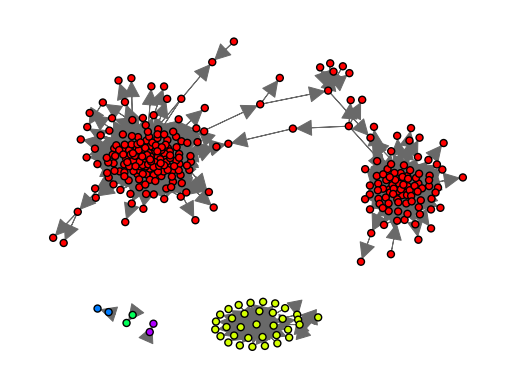

In [207]:
fig, ax = plt.subplots()
ig.plot(
    components,
    target=ax,
    palette=ig.RainbowPalette(),
    vertex_size=7,
    vertex_color=list(map(int, ig.rescale(components.membership, (0, 200), clamp=True))),
    edge_width=0.7
)
plt.show()

In [208]:
len(components)

5

In [209]:
##
num_components = len(components)
max_iter = 100
iter = 0
k = 20 # Number of edges to rmv every iteration
target_components = 30

while num_components <= target_components and iter<=max_iter:
  betweenness_centralities = betweenness_centrality_of_edges(g)
  betweenness_centralities.sort(key=lambda x: x[1], reverse=True)
  edges_to_rmv = [edges for edges,bs in betweenness_centralities[:k]]

  edge_indices_to_remove = [g.get_eid(source, target) for source, target in edges_to_rmv]
  g.delete_edges(edge_indices_to_remove)
  num_components = len(g.connected_components(mode='weak'))
  iter += 1
  print(iter)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


In [210]:
num_components

31

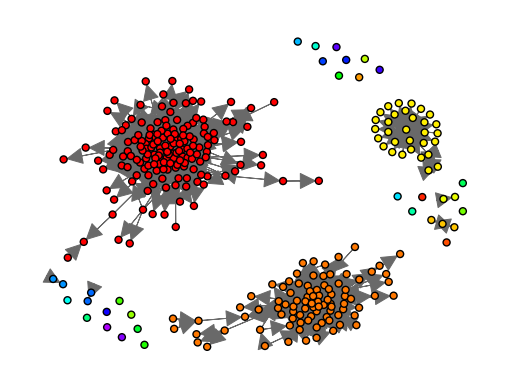

In [211]:
components = g.connected_components(mode='weak')
fig, ax = plt.subplots()
ig.plot(
    components,
    target=ax,
    palette=ig.RainbowPalette(),
    vertex_size=7,
    vertex_color=list(map(int, ig.rescale(components.membership, (0, 200), clamp=True))),
    edge_width=0.7
)
plt.show()